# MidTerm


In [491]:
import warnings

warnings.filterwarnings("ignore")

## Library import


In [492]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset


In [493]:
customer = pd.read_csv("datasets/customer.csv")
customer.head()

,UserID,Gender,Profession,LifeStyle,Age,EstimatedSalary,Purchased
0,15624510,Male,Student,Low,19.0,19000,0
1,15810944,Male,NaN,Low,35.0,20000,0
2,15668575,Female,Student,Low,26.0,43000,0
3,15603246,Female,Student,Low,27.0,57000,0
4,15804002,Male,Student,Low,19.0,76000,0


## EDA


In [494]:
customer.shape

(20, 7)

In [495]:
customer.index

RangeIndex(start=0, stop=20, step=1)

In [496]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserID           20 non-null     int64  
 1   Gender           20 non-null     object 
 2   Profession       18 non-null     object 
 3   LifeStyle        20 non-null     object 
 4   Age              18 non-null     float64
 5   EstimatedSalary  20 non-null     int64  
 6   Purchased        20 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.2+ KB


In [497]:
customer["Profession"].describe()

count          18
unique          3
top       Student
freq           13
Name: Profession, dtype: object

In [498]:
customer.isnull()

,UserID,Gender,Profession,LifeStyle,Age,EstimatedSalary,Purchased
0,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [499]:
customer.isnull().sum()

UserID             0
Gender             0
Profession         2
LifeStyle          0
Age                2
EstimatedSalary    0
Purchased          0
dtype: int64

## Visualization


In [500]:
# customer["Age"] = customer["Age"].astype(str)
customer["Gender"] = customer["Gender"].astype(str)

In [501]:
customer.isnull().sum()

UserID             0
Gender             0
Profession         2
LifeStyle          0
Age                2
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='count'>

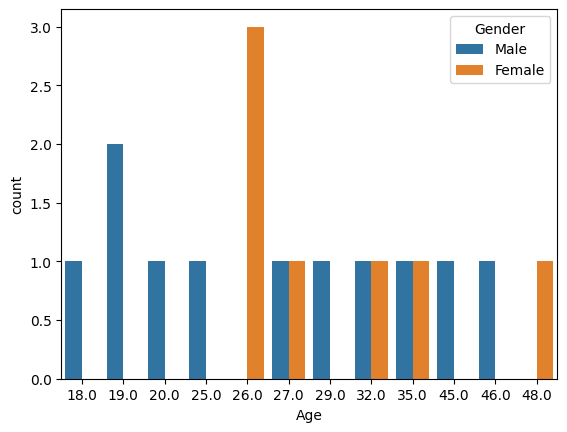

In [502]:
sns.countplot(x="Age", hue="Gender", data=customer)

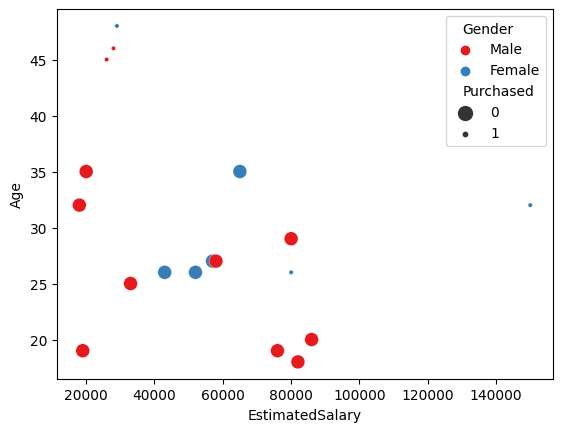

In [503]:
sns.scatterplot(
    x="EstimatedSalary",
    y="Age",
    hue="Gender",
    size="Purchased",
    data=customer,
    palette="Set1",
    sizes=(10, 100)
)
plt.show()

<Axes: xlabel='Age'>

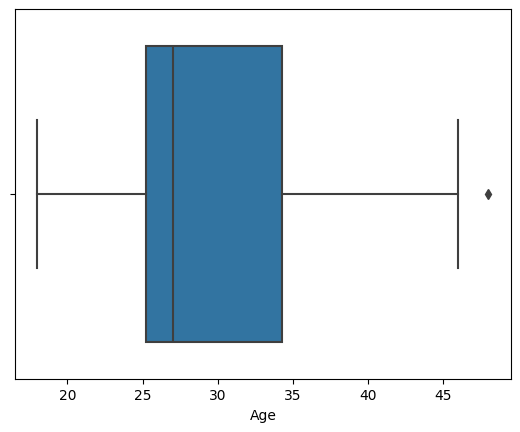

In [504]:
sns.boxplot(x="Age", data=customer)

## Preprocessing 


### Dropping unnecessary colums

In [505]:
customer.head()
customer.isnull().sum()

UserID             0
Gender             0
Profession         2
LifeStyle          0
Age                2
EstimatedSalary    0
Purchased          0
dtype: int64

In [506]:
customer.drop(["UserID"], axis=1, inplace=True)
customer.head()

,Gender,Profession,LifeStyle,Age,EstimatedSalary,Purchased
0,Male,Student,Low,19.0,19000,0
1,Male,NaN,Low,35.0,20000,0
2,Female,Student,Low,26.0,43000,0
3,Female,Student,Low,27.0,57000,0
4,Male,Student,Low,19.0,76000,0


### Filling missing values

In [507]:
customer.isnull().sum()

Gender             0
Profession         2
LifeStyle          0
Age                2
EstimatedSalary    0
Purchased          0
dtype: int64

In [508]:
mode = customer["Profession"].mode()[0]
mode

'Student'

In [509]:
customer["Profession"] = customer["Profession"].fillna(mode)

In [510]:
customer.isnull().sum()

Gender             0
Profession         0
LifeStyle          0
Age                2
EstimatedSalary    0
Purchased          0
dtype: int64

In [511]:
mean = customer["Age"].mean()
customer["Age"] = customer["Age"].fillna(mean)
customer.isnull().sum()

Gender             0
Profession         0
LifeStyle          0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Feature Engg

In [512]:
customer.head()

,Gender,Profession,LifeStyle,Age,EstimatedSalary,Purchased
0,Male,Student,Low,19.0,19000,0
1,Male,Student,Low,35.0,20000,0
2,Female,Student,Low,26.0,43000,0
3,Female,Student,Low,27.0,57000,0
4,Male,Student,Low,19.0,76000,0


In [513]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [514]:
customer["Gender"] = le.fit_transform(customer["Gender"])
customer.head()

,Gender,Profession,LifeStyle,Age,EstimatedSalary,Purchased
0,1,Student,Low,19.0,19000,0
1,1,Student,Low,35.0,20000,0
2,0,Student,Low,26.0,43000,0
3,0,Student,Low,27.0,57000,0
4,1,Student,Low,19.0,76000,0


In [515]:
customer["Profession"].unique()

array(['Student', 'Intern', 'Job Holder'], dtype=object)

In [516]:
customer = pd.get_dummies(customer, columns=["Profession"])
customer.head()

,Gender,LifeStyle,Age,EstimatedSalary,Purchased,Profession_Intern,Profession_Job Holder,Profession_Student
0,1,Low,19.0,19000,0,False,False,True
1,1,Low,35.0,20000,0,False,False,True
2,0,Low,26.0,43000,0,False,False,True
3,0,Low,27.0,57000,0,False,False,True
4,1,Low,19.0,76000,0,False,False,True


In [517]:
customer["Profession_Intern"] = le.fit_transform(customer["Profession_Intern"])
customer["Profession_Student"] = le.fit_transform(customer["Profession_Student"])
customer.head()

,Gender,LifeStyle,Age,EstimatedSalary,Purchased,Profession_Intern,Profession_Job Holder,Profession_Student
0,1,Low,19.0,19000,0,0,False,1
1,1,Low,35.0,20000,0,0,False,1
2,0,Low,26.0,43000,0,0,False,1
3,0,Low,27.0,57000,0,0,False,1
4,1,Low,19.0,76000,0,0,False,1


In [518]:
customer.drop(["Profession_Job Holder"], axis=1, inplace=True)
customer.head()

,Gender,LifeStyle,Age,EstimatedSalary,Purchased,Profession_Intern,Profession_Student
0,1,Low,19.0,19000,0,0,1
1,1,Low,35.0,20000,0,0,1
2,0,Low,26.0,43000,0,0,1
3,0,Low,27.0,57000,0,0,1
4,1,Low,19.0,76000,0,0,1


In [519]:
customer["LifeStyle"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [520]:
customer = pd.get_dummies(customer, columns=["LifeStyle"])
customer.head()

,Gender,Age,EstimatedSalary,Purchased,Profession_Intern,Profession_Student,LifeStyle_High,LifeStyle_Low,LifeStyle_Medium
0,1,19.0,19000,0,0,1,False,True,False
1,1,35.0,20000,0,0,1,False,True,False
2,0,26.0,43000,0,0,1,False,True,False
3,0,27.0,57000,0,0,1,False,True,False
4,1,19.0,76000,0,0,1,False,True,False


In [521]:
customer["LifeStyle_High"] = le.fit_transform(customer["LifeStyle_High"])
customer["LifeStyle_Medium"] = le.fit_transform(customer["LifeStyle_Medium"])
customer.head()

,Gender,Age,EstimatedSalary,Purchased,Profession_Intern,Profession_Student,LifeStyle_High,LifeStyle_Low,LifeStyle_Medium
0,1,19.0,19000,0,0,1,0,True,0
1,1,35.0,20000,0,0,1,0,True,0
2,0,26.0,43000,0,0,1,0,True,0
3,0,27.0,57000,0,0,1,0,True,0
4,1,19.0,76000,0,0,1,0,True,0


In [522]:
customer.drop(["LifeStyle_Low"], axis=1, inplace=True)
customer.head()

,Gender,Age,EstimatedSalary,Purchased,Profession_Intern,Profession_Student,LifeStyle_High,LifeStyle_Medium
0,1,19.0,19000,0,0,1,0,0
1,1,35.0,20000,0,0,1,0,0
2,0,26.0,43000,0,0,1,0,0
3,0,27.0,57000,0,0,1,0,0
4,1,19.0,76000,0,0,1,0,0


In [523]:
customer

,Gender,Age,EstimatedSalary,Purchased,Profession_Intern,Profession_Student,LifeStyle_High,LifeStyle_Medium
0,1,19.000000,19000,0,0,1,0,0
1,1,35.000000,20000,0,0,1,0,0
2,0,26.000000,43000,0,0,1,0,0
3,0,27.000000,57000,0,0,1,0,0
4,1,19.000000,76000,0,0,1,0,0
5,1,27.000000,58000,0,0,1,0,0
6,0,29.722222,84000,0,0,1,0,0
7,0,32.000000,150000,1,1,0,0,1
8,1,25.000000,33000,0,0,1,0,0
9,0,35.000000,65000,0,0,1,0,0


### Scaling

In [524]:
y = customer["Purchased"]
x = customer.drop("Purchased",axis=1)

In [525]:
print(y)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
Name: Purchased, dtype: int64


In [526]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)
print(x.shape)

[[ 0.81649658 -1.26379667 -1.12723441 -0.33333333  0.57735027 -0.5
  -0.33333333]
 [ 0.81649658  0.62207608 -1.09639352 -0.33333333  0.57735027 -0.5
  -0.33333333]
 [-1.22474487 -0.43872734 -0.38705313 -0.33333333  0.57735027 -0.5
  -0.33333333]
 [-1.22474487 -0.32086029  0.04471929 -0.33333333  0.57735027 -0.5
  -0.33333333]
 [ 0.81649658 -1.26379667  0.63069613 -0.33333333  0.57735027 -0.5
  -0.33333333]
 [ 0.81649658 -0.32086029  0.07556017 -0.33333333  0.57735027 -0.5
  -0.33333333]
 [-1.22474487  0.          0.87742323 -0.33333333  0.57735027 -0.5
  -0.33333333]
 [-1.22474487  0.26847494  2.91292176  3.         -1.73205081 -0.5
   3.        ]
 [ 0.81649658 -0.55659439 -0.695462   -0.33333333  0.57735027 -0.5
  -0.33333333]
 [-1.22474487  0.62207608  0.29144638 -0.33333333  0.57735027 -0.5
  -0.33333333]
 [-1.22474487 -0.43872734  0.75405968  3.         -1.73205081 -0.5
   3.        ]
 [-1.22474487 -0.43872734 -0.10948515 -0.33333333  0.57735027 -0.5
  -0.33333333]
 [ 0.81649658 -1